# Turkish Music Emotion Model Evaluation Report

## Carga de datos y modelo

In [1]:
import sys
sys.path.append('..')
from turkish_music_emotion.model_evaluation_utils import ModelEvaluationUtils

MODEL_URI = "http://24.144.69.175:5000/#/experiments/10/runs/cf6fecc5c83b4447809e1875a1669ff3"
DATA_PATH = "../data/processed/Acoustic_Features_Processed.csv"

evaluator = ModelEvaluationUtils(MODEL_URI, DATA_PATH)

2024-10-19 23:29:48.635 | INFO     | turkish_music_emotion.config:<module>:11 - PROJ_ROOT path is: /Users/larguelles/Documents/2 - Areas/mna/mlops/proyecto


Setting tracking URI to: http://24.144.69.175:5000
Extracted run_id: cf6fecc5c83b4447809e1875a1669ff3
Loading model from URI: runs:/cf6fecc5c83b4447809e1875a1669ff3/model


2024/10/19 23:29:52 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.17.0, required: mlflow==2.16.2)
 - cloudpickle (current: 3.1.0, required: cloudpickle==3.0.0)
 - numpy (current: 2.1.2, required: numpy==2.1.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/10/19 23:29:52 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.10.11`, differs from the version of Python that is currently running, `Python 3.12.7`, and may be incompatible


## Preparación de los datos

In [2]:
X, y = evaluator.prepare_data()
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (400, 50)
Target shape: (400,)


## Predicciones

In [3]:
y_pred = evaluator.make_predictions(X)

## Métricas de desempeño

accuracy, precision, recall, f1 = evaluator.calculate_metrics(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Matriz de confusión

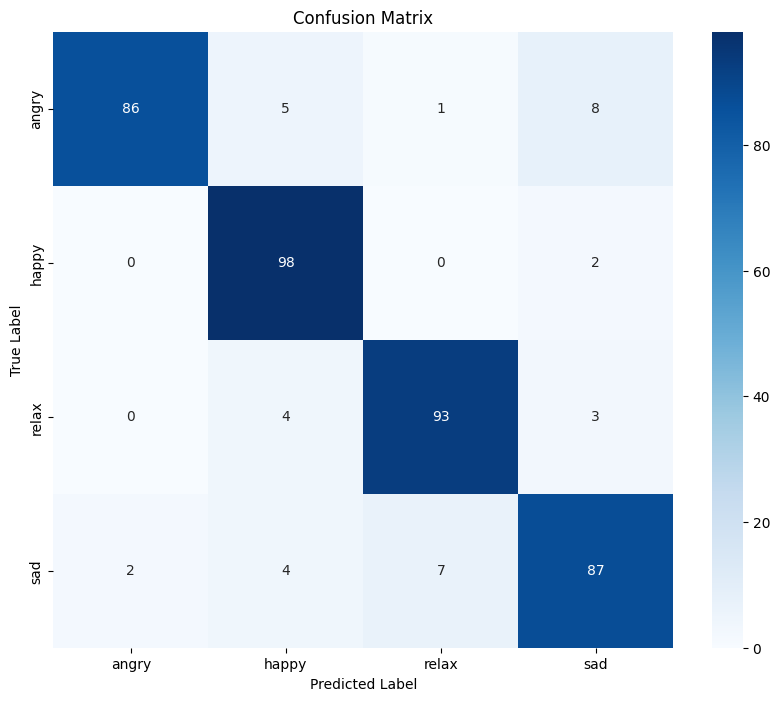

In [4]:
evaluator.plot_confusion_matrix(y, y_pred)

## Reporte de clasificación

In [5]:
report = evaluator.generate_classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

       angry       0.98      0.86      0.91       100
       happy       0.88      0.98      0.93       100
       relax       0.92      0.93      0.93       100
         sad       0.87      0.87      0.87       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Análisis y conclusiones

Basándonos en el informe de clasificación proporcionado, podemos extraer las siguientes conclusiones sobre el rendimiento de nuestro modelo:

1. **Precisión Global**: 
   El modelo alcanza una precisión global del 91% (0.91), lo que indica un rendimiento muy bueno en la clasificación de emociones en la música turca.

2. **Rendimiento por Clase**:
   - **Angry (Enojado)**:
     - Precisión: 98% - El modelo es muy preciso al identificar la emoción "enojado".
     - Recall: 86% - Sin embargo, tiende a perder algunos casos de "enojado".
     - F1-score: 91% - Buen equilibrio entre precisión y recall.

   - **Happy (Feliz)**:
     - Precisión: 88% - Buena precisión, aunque menor que para "enojado".
     - Recall: 98% - Excelente en identificar casi todos los casos de "feliz".
     - F1-score: 93% - Muy buen rendimiento general para esta clase.

   - **Relax (Relajado)**:
     - Precisión: 92% - Muy buena precisión.
     - Recall: 93% - Consistente con la precisión, indica un rendimiento equilibrado.
     - F1-score: 93% - Rendimiento muy bueno y equilibrado.

   - **Sad (Triste)**:
     - Precisión: 87% - La precisión más baja entre todas las clases, pero aún así buena.
     - Recall: 87% - Consistente con la precisión.
     - F1-score: 87% - Buen rendimiento, aunque ligeramente inferior a las otras clases.

3. **Análisis Comparativo**:
   - La emoción "enojado" tiene la mayor precisión, pero el menor recall.
   - "Feliz" tiene el mayor recall, pero la menor precisión (excluyendo "triste").
   - "Relajado" muestra el rendimiento más equilibrado entre todas las clases.
   - "Triste" tiene el rendimiento más bajo en general, aunque sigue siendo bueno.

4. **Implicaciones**:
   - El modelo es particularmente efectivo en identificar música "relajada" y "feliz".
   - Tiende a ser más cauteloso al clasificar música como "enojada", lo que resulta en alta precisión pero menor recall.
   - Podría haber cierta confusión entre las clases "triste" y otras emociones, dado su rendimiento ligeramente inferior.

5. **Áreas de Mejora**:
   - Enfocarse en mejorar la identificación de música "triste" podría aumentar el rendimiento general del modelo.
   - Trabajar en el balance entre precisión y recall para la clase "enojado" podría ser beneficioso.

En general, el modelo muestra un rendimiento muy sólido en la clasificación de emociones en música turca, con un equilibrio impresionante entre las diferentes clases emocionales. Este modelo podría ser muy útil en aplicaciones prácticas como sistemas de recomendación musical o análisis de composiciones musicales basadas en emociones.